# Using a pre-arranged simulation workflow
* Pre-arranged workflows are available which apply the steps above (and maybe more) automatically
* These workflow functions can automatically simulate turbines of different design in a single function call
* These workflows can also be instructed to distribute themselves across multiple CPUs

In [1]:
import reskit as rk
from reskit import windpower

In [2]:
# Placment locations do not have to be put in as a pandas dataframe (a list of coordinates would also be okay), but 
#  it is also the most flexible. Therefore, this manner is suggested

import geokit as gk
placements = gk.vector.extractFeatures(rk._TEST_DATA_['random_turbines.shp'])

placements.head()

,geom,capacity,rotordiam,hubHeight
0,POINT (6.38153 50.81577),2300,144,120
1,POINT (6.00788 50.93225),2300,136,110
2,POINT (6.02563 50.6547),3600,144,130
3,POINT (6.06798 50.78267),3600,144,120
4,POINT (6.01534 50.98373),3600,144,130


In [3]:
gen = windpower.workflowOnshore(placements=placements,
                                source=rk._TEST_DATA_['weather_data'], # path to MERRA2 data on your hard drive
                                landcover=rk._TEST_DATA_['clc-aachen_clipped.tif'], # Path to corine land cover (or anther land cover dataset) on your hard drive
                                gwa=rk._TEST_DATA_['gwa50-like.tif'], # Path to global wind atlas (at 50m, to match MERRA) on your hard drive 
                                extract='raw', # means timeseries electricity generation from each turbine should be returned
                               )

Starting at: 2020-01-03 13:29:09.920334
Arranging placements at +0.00s
Convolving power curves at +0.01s
   Convolving 9 power curves...
Starting simulations at at +7.97s
 0: Starting at +7.97s
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.PS.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.SWGDN.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.T2MDEW.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.U50M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V2M.nc4
c:\users\s.ryberg\fzj\repos\res\reskit\test\data\weather_data\MERRA_tavg1_2d.2015.Europe.V50M.nc4
 0: Starting batch 1 of 

In [4]:
gen.head()

,"(6.38153,50.81577)","(6.00788,50.93225)","(6.02563,50.65470)","(6.06798,50.78267)","(6.01534,50.98373)","(6.31797,50.74828)","(6.01472,50.90833)","(6.43125,50.91387)","(6.07724,50.67113)","(6.43676,50.75053)",...,"(6.25329,50.78154)","(6.03659,50.53529)","(6.44494,50.60918)","(6.25984,50.58901)","(6.47732,50.76342)","(6.21067,50.80739)","(6.23556,50.80349)","(6.07161,50.95219)","(6.08606,50.99086)","(6.20713,50.61674)"
2015-01-01 00:30:00.000013+00:00,342.723601,302.475273,198.033350,274.254154,315.630334,134.829076,479.880362,381.759251,119.386005,108.913526,...,284.350080,122.403371,173.164007,55.076876,161.876756,498.377785,205.586854,376.482065,337.377747,157.453152
2015-01-01 01:30:00+00:00,331.763776,322.688869,194.223487,277.281552,342.886019,126.504233,504.757923,377.193939,115.615380,101.459793,...,274.042765,113.666470,155.092757,47.684301,151.728512,490.130577,199.298086,399.403300,360.885371,144.338779
2015-01-01 02:30:00.000026+00:00,309.261369,320.965459,180.579439,263.645365,343.546978,112.163465,499.975255,360.847286,105.551442,90.332718,...,251.136641,100.848576,133.208274,38.789227,136.988248,460.285767,181.789971,393.412362,357.007021,126.099001
2015-01-01 03:30:00.000013+00:00,269.737701,289.931175,162.515706,233.812680,305.904439,92.712733,456.642266,316.821316,92.502522,75.402558,...,215.167344,90.432898,113.682712,31.381463,116.414133,405.251935,152.119030,345.952794,311.169987,108.479312
2015-01-01 04:30:00+00:00,302.833599,335.465536,209.935456,283.300686,353.412731,111.025606,521.860264,350.741379,119.937283,89.206850,...,246.321303,125.731958,134.503893,42.062539,135.186168,456.403516,177.516655,397.322031,353.417980,135.642125


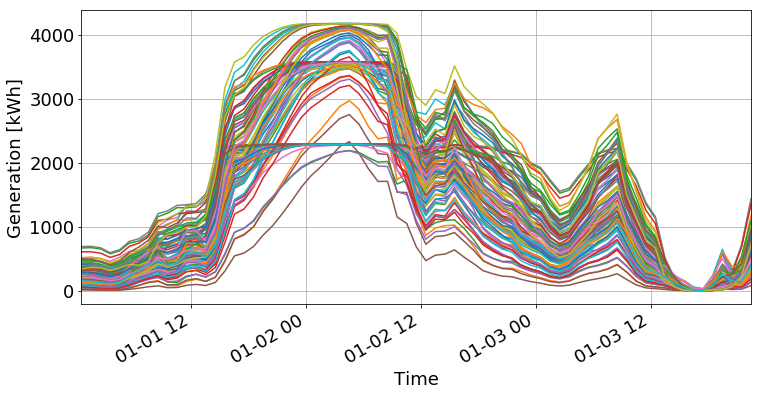

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rc('font',size=18)
gen.plot(legend=False, figsize=(12,6))
plt.ylabel("Generation [kWh]")
plt.xlabel("Time")
plt.grid()
plt.show()